![Logo01](images/logo.png "Logo01")
<b>Mestrando: Helvecio Bezerra Leal Neto </b><br>

<b>Prof: Reinaldo R. Rosa </b>

<b> 1 - <span style="color:blue;">Simulação de Sinais Estocásticos com N=2$^{12}$ valores de medidas.</span> </b>


1.1 Utilize o algoritmo powernoise.m e gere os seguintes ruídos 1/$f^\beta$:

S1: $\beta$=0 (white noise) <br>
S2: $\beta$=1 (pink noise)  <br>
S3: $\beta$=2 (red noise)

In [ ]:
#Create Signals by Powernoise.m and pmodel.m
from create_signals import create_data
create_data()

In [1]:
import pandas as pd

s1 = pd.read_csv('./data/s1_white_noise.csv',header=None)
s2 = pd.read_csv('./data/s2_pink_noise.csv',header=None)
s3 = pd.read_csv('./data/s3_red_noise.csv',header=None)

In [2]:
import matplotlib.pyplot as plt
def plotSeries(series, title, name):
    
    plt.figure(figsize=(20,5))
    plt.plot(series, linewidth=1)
    plt.title(title, fontsize=16)
    plt.xlabel('Time',fontsize=16)
    plt.ylabel('Amplitude',fontsize=16)
    plt.savefig('./images/'+name+'.png')

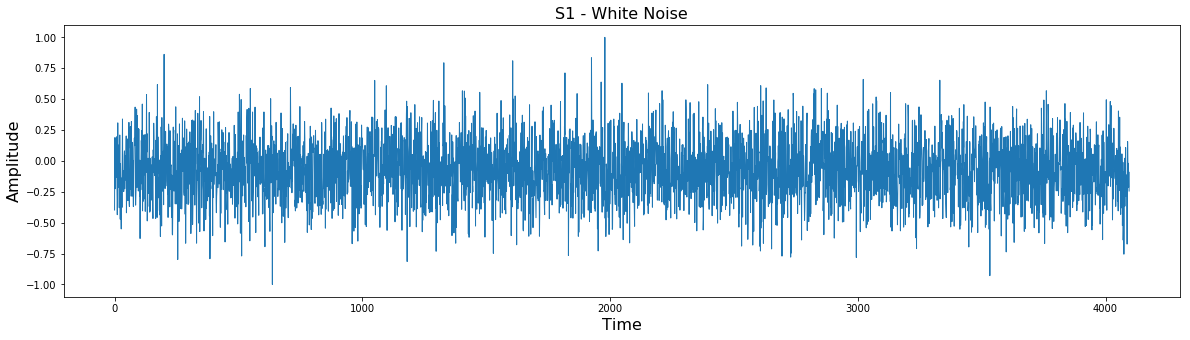

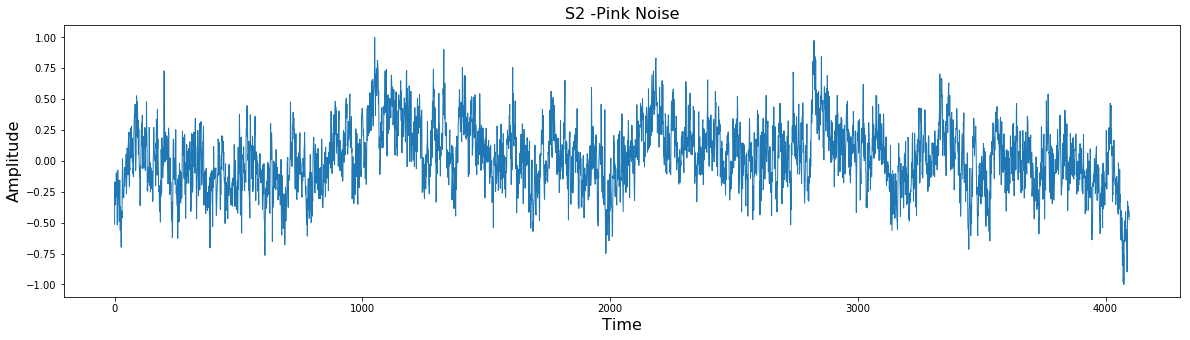

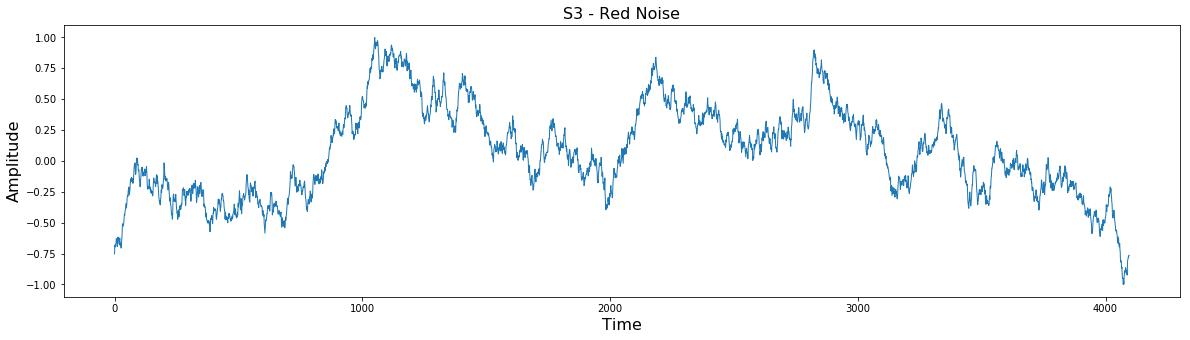

In [3]:
plotSeries(s1, "S1 - White Noise β=0","s1_white_noise")
plotSeries(s2, "S2 -Pink Noise β=1","s2_pink_noise")
plotSeries(s3, "S3 - Red Noise β=2","s3_red_noise")

1.2. S4: Série Caótica a partir do Mapeamento Quadrático (Logístico) para ρ=3.85,
considerando Ao=0.001.

In [4]:
import numpy as np

def logisticc_map(n, x_t=0.001, r=4):
    S4 = np.repeat(x_t, n)
    for i in range(n-1):
        S4[i+1] = r * S4[i] * (1-S4[i])
        x_t+= x_t
    return S4

In [5]:
s4_ = logisticc_map(4096)
s4 = pd.DataFrame(s4_,index=None)

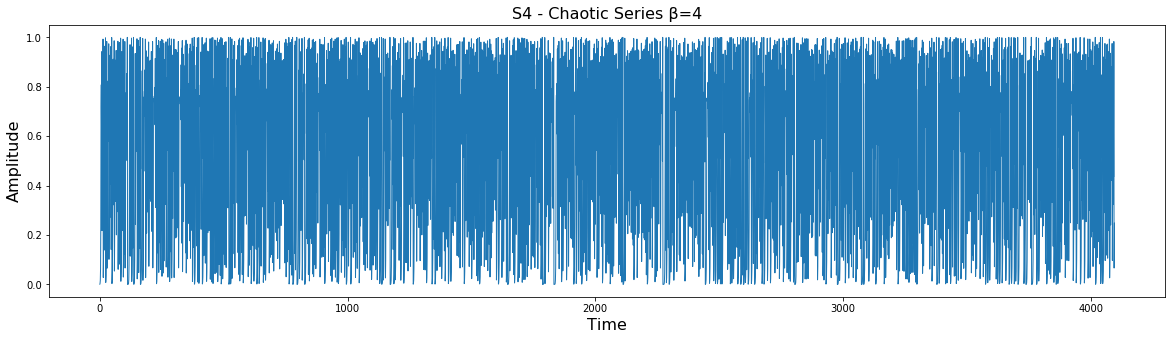

In [14]:
plotSeries(s4, "S4 - Chaotic Series β=4","s4_chaotic")

1.3. Gere o algoritmo em python para somar e normalizar com < A >=0, dois sinais
com o mesmo tamanho e construa a série S5=S1+S4, S6=S2+S4 e S7=S3+S4.

In [7]:
s1 = np.asanyarray(s1)
s2 = np.asanyarray(s2)
s3 = np.asanyarray(s3)
s4 = np.asanyarray(s4)

s5 = s1 + s4
s6 = s2 + s4
s7 = s3 + s5

In [8]:
def normalize(series):
    return ((series - min(series)) / (max(series) - min(series)) - 0.5) * 2

In [9]:
# Normalizada
s5 = normalize(s5)
s6 = normalize(s6)
s7 = normalize(s7)

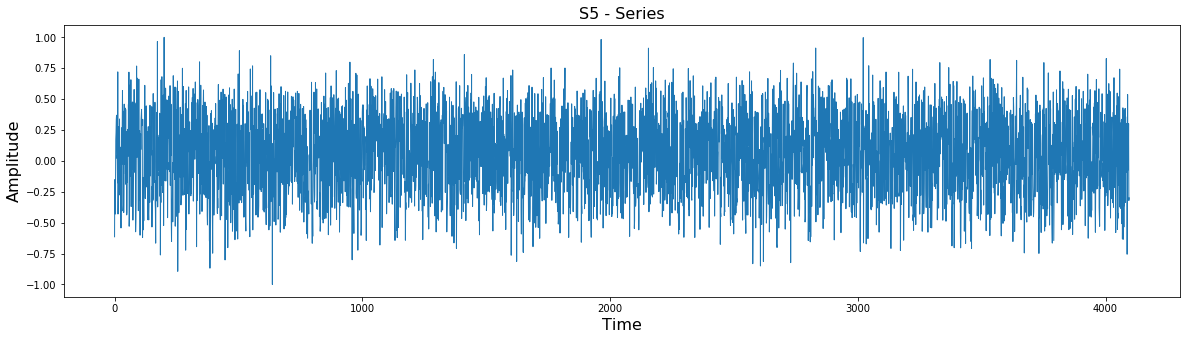

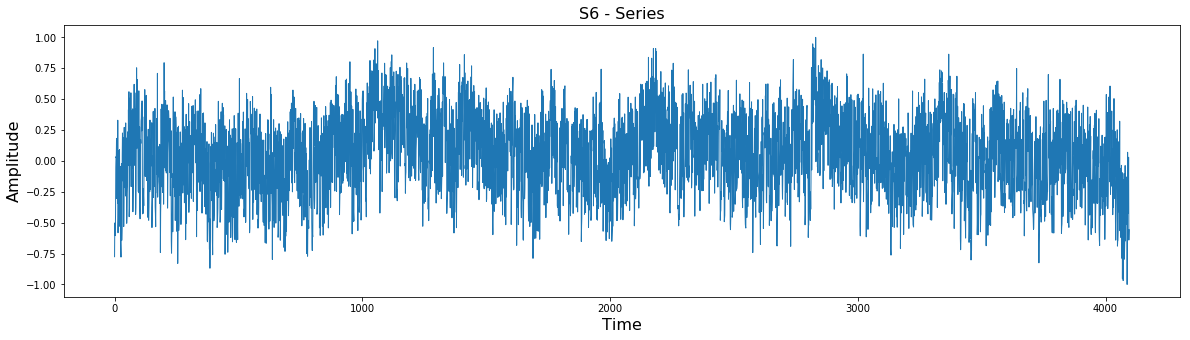

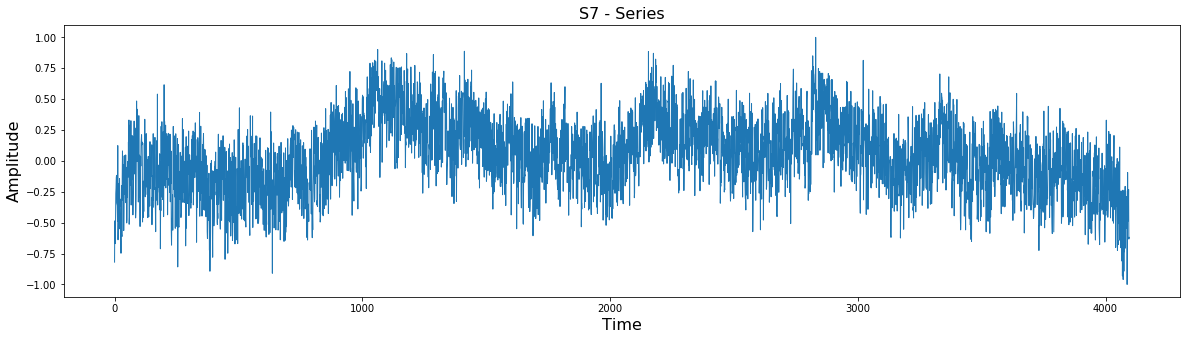

In [10]:
plotSeries(s5,"S5 - Series","s5_series")
plotSeries(s6,"S6 - Series","s6_series")
plotSeries(s7,"S7 - Series","s7_series")

1.4. Utilize o algoritmo pmodel.m e gere os seguintes sinais com N=2$^{12}$ valores de medidas:

    S8: p=0.52, β=-1.66
    S9: p=0.62, β=-0.45
    S10: p=0.72, β=-0.75

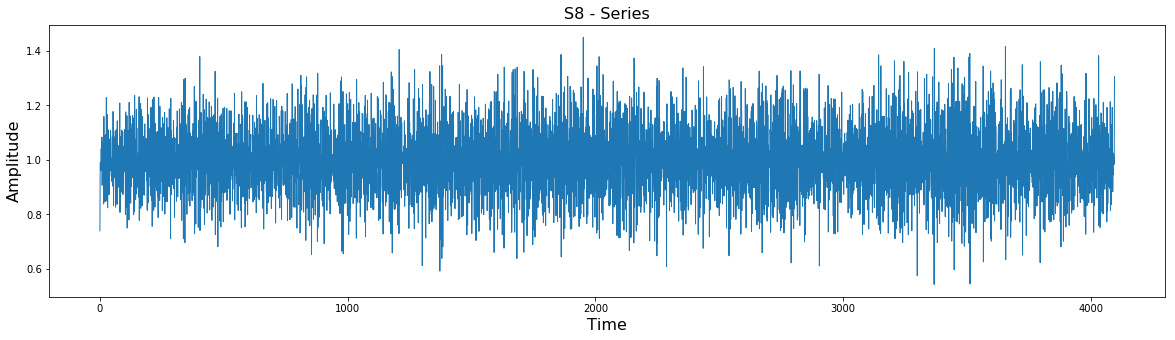

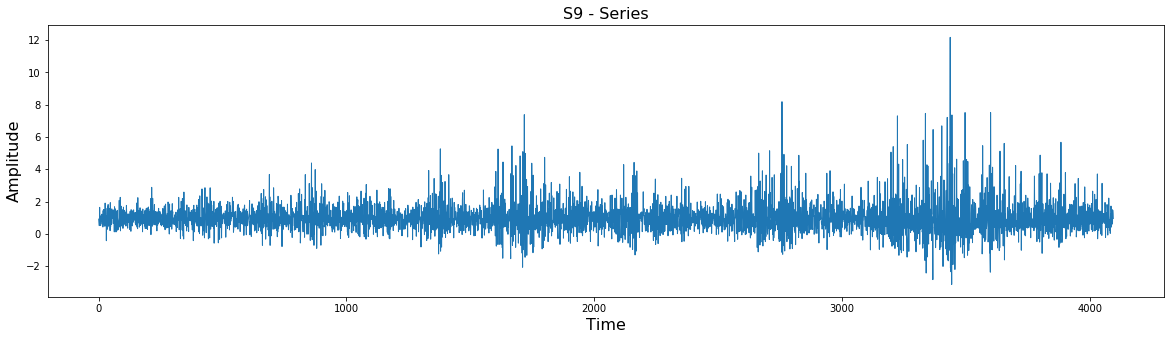

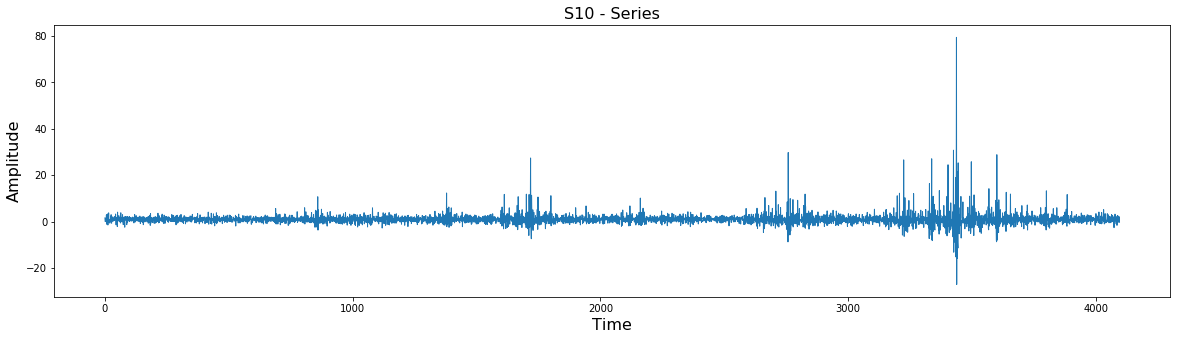

In [11]:
s8  = pd.read_csv('./data/s8.csv',header=None)
s9  = pd.read_csv('./data/s9.csv',header=None)
s10 = pd.read_csv('./data/s10.csv',header=None)

s8 = s8.transpose()
s9 = s9.transpose()
s10 = s10.transpose()

plotSeries(s8,"S8 - Series","s8_series")
plotSeries(s9,"S9 - Series","s9_series")
plotSeries(s10,"S10 - Series","s10_series")

/home/helvecio/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


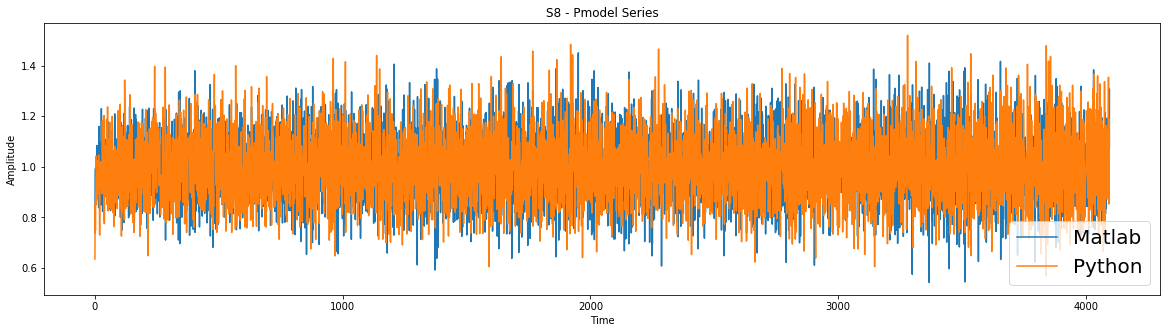

In [12]:
#Import pmodel from pmodel.py file
from pmodel import pmodel

s8Pmodel =  pmodel(4096,0.52,0.16)

fig, ax = plt.subplots(figsize=(20, 5))
ax.plot(s8, label='Matlab')
ax.plot(s8Pmodel, label='Python')
ax.set_xlabel('Time')
ax.set_ylabel('Amplitude')
ax.title.set_text('S8 - Pmodel Series')
ax.legend(fontsize=20, loc='lower right')
fig.show()

<b> 2 - <span style="color:blue;">Distribuições de Probabilidades</span> </b>

2.1. Escreva um programa em python que, para uma amostra com N resultados,
ajuste as seguintes PDFs:

(i)Uniforme, (ii) Binomial, (iii) Beta, (iv) Laplace, (v) Gamma, (vi) Expoencial, (v) Qui-quadrado, (vi) Cauchy, (vii) Beta e (viii) Gaussiana ( Normal )

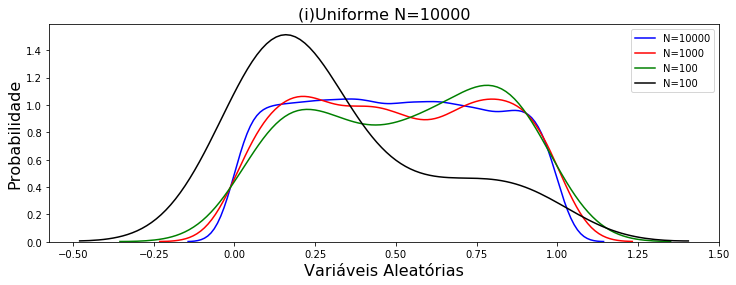

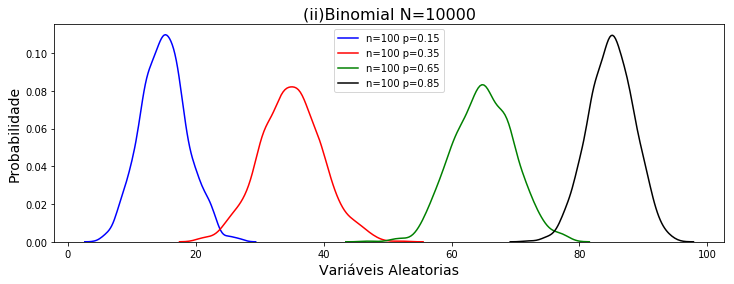

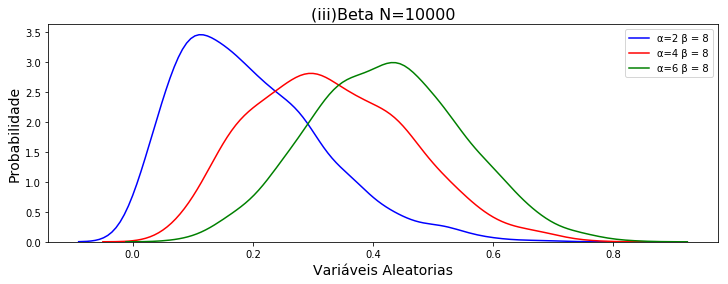

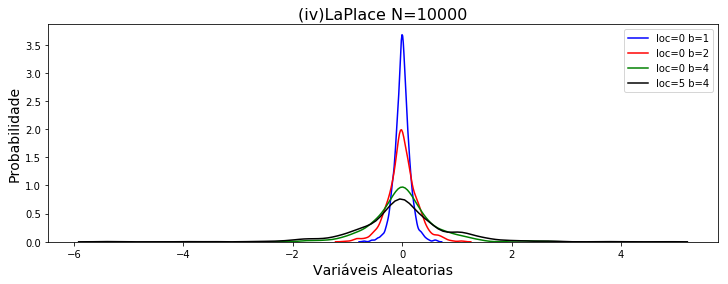

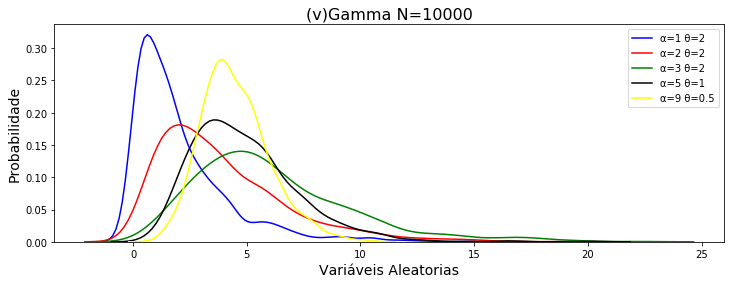

In [3]:
#Importando do arquivo prob_dist.py
import prob_dist as pdist

pdist.uniforme()
pdist.binomial()
pdist.beta()
pdist.laplace()
pdist.gamma()

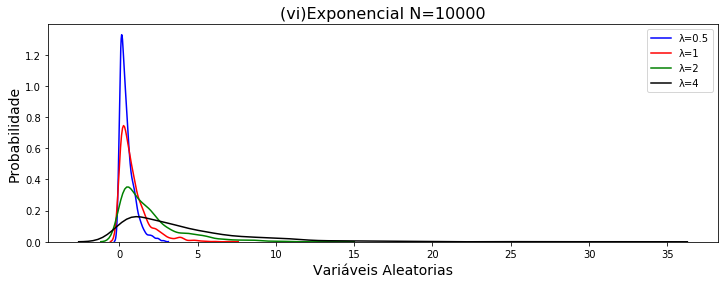

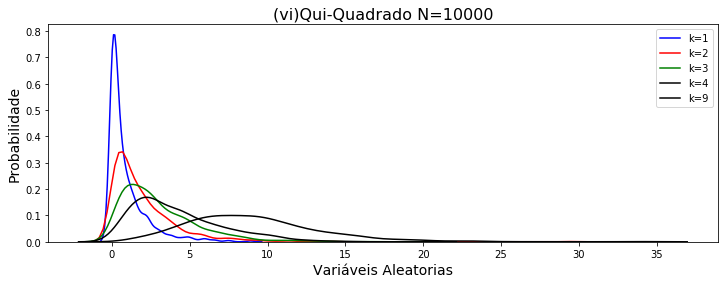

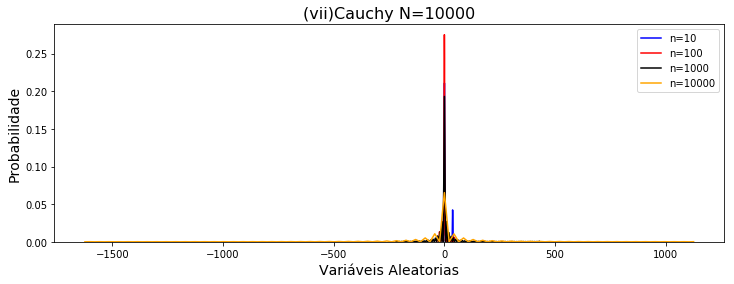

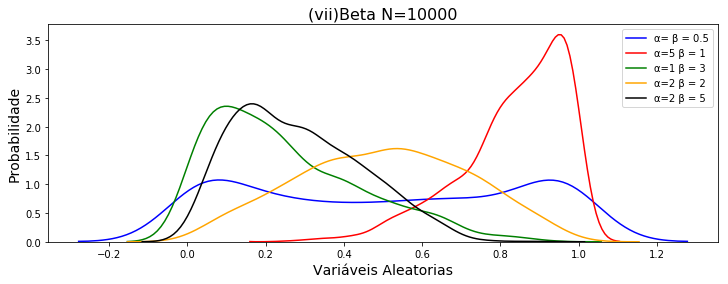

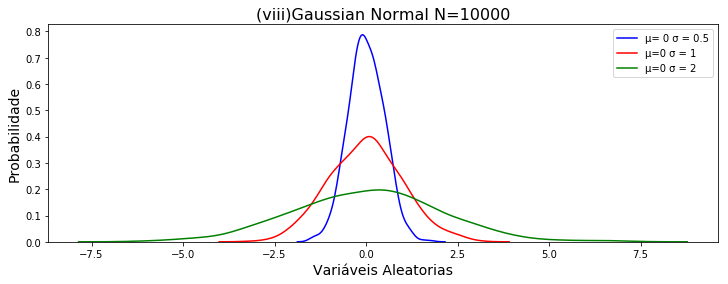

In [4]:
pdist.exponencial()
pdist.quiquadrado()
pdist.cauchy()
pdist.beta_()
pdist.gaussian_normal()

2.2. Considere o seguinte experimento: Lançamento de 3 dados simultâneos com
registro de quantas vezes um determinado resultado pode ser obtido.
Mostre que a distribuição limite é binomial e que com N tendendo a infinito
ela converge para uma Gaussiana.

In [4]:
#Primeiro Lançamento
sucess = 1/6
fail = 5/6


l0 = ((((1/6)**9)*(5/6))*10)*100

#chance = 0 -> 5/6^n
#chance = 1 -> 1/6*5/6^(n-1)
#chance = 2 -> (1/6^(n-1))*5/6
#chance = 3 -> 1/6^n

#((((1/6)**2)*(5/6))*3)*100
#((5/6)**10)*100
#(((1/6)*((5/6)**10))*10)*100
((((1/6)**9)*(5/6))*10)*100
    

8.269085843960098e-05

Text(0, 0.5, 'Amplitude')

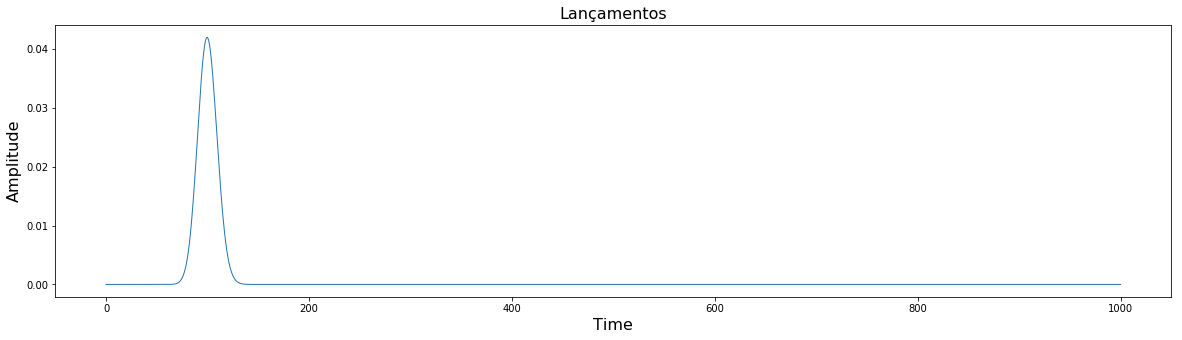

In [19]:
import numpy as np

def geraProbabilidades(n,p):
    probabilidades = np.zeros(n+1)
    
    q = 1 - p
    for numP in range(0,n + 1):
        numQ = n - numP

        combinacao_n_numP = fatorial(n)/(fatorial(numP)*fatorial(n - numP))
        probabilidades[numP] = combinacao_n_numP*np.power(p,numP)*np.power(q,numQ)
    
    return probabilidades

def fatorial(n):
    if(n<=1):
        return 1
    else:
        return (n*fatorial(n-1))

dados = geraProbabilidades(1000,0.1)

import matplotlib.pyplot as plt
    
plt.figure(figsize=(20,5))
plt.plot(dados, linewidth=1)
plt.title("Lançamentos", fontsize=16)
plt.xlabel('Time',fontsize=16)
plt.ylabel('Amplitude',fontsize=16)


<b> 3 - <span style="color:blue;">Probabilidade Condicional</span> </b>

3.1. Considere 3 regiões do céu contendo aproximadamente o mesmo número (N) de galáxias, cujas
Distribuições morfológicas dada por um modelo seja aquela apresentada na Tabela abaixo.

![Tabela01](./images/tabela_galaxias.png "Tabela01")

Em cada região será realizado um survey (S1, S2 e S3) considerando para cada uma
um telescópio. Supondo que os telescópios são equivalentes e que as observações
serão aleatórias calcule as seguintes probabilidades:

i) A primeira galáxia observada ser espiral ou elíptica.<br>

In [43]:
gs1 = 0.1 + 0.25 + 0.15
gs2 = 0.6 + 0.4 + 0.55
gs3 = 0.3 + 0.35 + 0.3

irregular = (gs1 / (gs1 + gs2 + gs3))*100
irregular
#100 - irregular

16.666666666666664


ii) Se a primeira galáxia observada for irregular, qual a probabilidade dela pertencer à região do survey
S1.

In [44]:
((0.1/3)*1)/(irregular/100)

0.20000000000000004

3.2. Considere o exercício anterior e crie um “bootstrap” para gerar 10 amostras contendo
200 galáxias cada uma. Considere os valores de morfologia caracterizados pelo parâmetro
g1 (da técnica gradient pattern analysis) dado na tabela abaixo.<br>
Irregulares: 1.97-1.99<br>
Espirais: 1.96-1.98<br>
Elípticas: 1.92-1.96<br>
Aplique o Teorema de Bayes para encontrar a máxima verossimilhança considerando os
modelos Gaussiano.

3.3. Supondo que SNIa ... ...estime tempo de telescopio....

<b> 4 - <span style="color:blue;">Teorema do Valor Extremo</span> </b>

Reconsidere o exercício anterior e aplique o Teorema de Bayes para encontrar a máxima
verossimilhança considerando o modelo GEV.

<b> 5 - <span style="color:blue;">Classificação de Cullen-Frey</span> </b>

Classifique a população de amostras geradas no exercício 3.2. no espaço de Cullen-Frey,
calcule os desvios e compare os desempenhos dos modelos.

<b> 6 - <span style="color:blue;">PSD & DFA: S3, S7, S8.</span> </b><br>
6.1. Considere as séries temporais listadas acima e obtenha os valores dos respectivos índices espectrais:
β (via PSD) e α (via DFA).<br>

6.2. Confira se o PSD está bem ajustado a partir da formula WKP: β = 2 α – 1.<br>

6.3. Repita 6.1. para (a) ST-Sol3GHz, (b) ST-surftemp504 e (c) uma ST de sua escolha (alternativa).

6.4. Com base nos valores de β (obtido via PSD e calculado via formula WKP).

<b> 7 - <span style="color:blue;">Singularity Multifractal Spectra (SMS), também conhecido como MDFA.</span> </b><br>
7.1. Considere o programa mfdfa.py. Aprimore o programa para o mesmo calcule o índice Ψ = Δα / α max .

7.2. Obtenha o espectro de singularidade para todos os sinais do exercício 6.

7.3. Com base nos valores obtidos em 7.2., discuta os possíveis processos subjacentes para cada ST.

8- Considere o software SPECTRUM e discuta, de forma comparativa e sucinta, outros métodos
para análise espectral de sinais não abordados no curso.

<b> 9 - <span style="color:blue;">Global Wavelet Spectrum.</span> </b><br>
9.1. Utilize o Waipy para obter o GWS (Morlet) de todos as ST do exercício 6.1.

9.2. Repita 9.1. utilizando uma Db8.

<b> 10 - <span style="color:blue;">10- Self-Organized Criticality (SOC)</span> </b><br>
<span style="color:blue;">i) Calcule a Taxa Local de Flutuação [Υi] para cada valor da ST</span> </b>


<span style="color:blue;">ii) Calcule P[Υi] = counts(ni) / N</span> </b><br>

<span style="color:blue;">iii) Plot logP[Υi] x log ni (e ajuste uma lei de potencia).</span> </b><br>


10.1. Implemente um algoritmo em Python para caracterização de SOC a partir de uma ST.

10.2. Aplique o SOC.py para todas as ST do exercício 6.1.

<b> 11 - <span style="color:blue;">EXERCÍCIO BONUS: +1.0 NA NOTA FINAL</span> </b><br>
<span style="color:blue;">Crie uma suíte em Python que tem como entrada uma ST e como saída um classificador
do padrão de variabilidade da ST em um plano β* x Ψ</span> </b><br>